# **GUIA DE LABORATORIO **

## **APELLIDOS, Nombres:** AQUINO CURISINCHE, Harold Jhonatan
**Fecha:** Sábado 25 de Mayo del 2024-1 Tec

# STANDARD LIBRARIES:

Importamos las librerias necesarias para la visualización de gráficos

In [3]:
import pandas as pd
pd.Timestamp.today().strftime('%Y-%m-%d %H:%M:%S') # Se capta la fecha y hora actual

'2024-06-16 16:38:57'

In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [5]:
from matplotlib import style
plt.style.use('ggplot')
#plt.style.use('seaborn-darkgrid')
#plt.style.use('fivethirtyeight')

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,5
plt.rcParams['axes.facecolor'] = 'white'

In [6]:
import seaborn as sns
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# CUSTOMIZED LIBRARIES:

Se importa la clase SVC para el entrenamiento de máquinas de vectores de soporte, luego el accuray score para evaluar el rendimiento de un modelo de clasificación, por último el yfinance para descargar los datos financieros históricos.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [30]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [10]:
import yfinance as yf
yf

<module 'yfinance' from 'C:\\Users\\harol\\anaconda3\\Lib\\site-packages\\yfinance\\__init__.py'>

# EXTRACCION DE DATOS:

Se establece una fecha de inicio y una fecha de inicialización para la visualización de los precios y se procede a descargar los datos financieros, en este caso se descargo de FSM (Fortuna Silver Mines).

In [11]:
ticker = 'BHP'
start_date = '2020-01-01'
end_date = '2023-12-31'

In [12]:
# Se establece la fecha de inicio para los datos de precios
print(start_date)
print(type( start_date ))

2021-01-01
<class 'str'>


In [13]:
# Set end dates for the price data
# Establecer fechas finalización para los datos de precios

end_date = pd.Timestamp.today().strftime('%Y-%m-%d')

print(end_date)
print(type( end_date ))

2024-06-16
<class 'str'>


In [14]:
df = yf.download(ticker, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [15]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,868.000000,868.000000,868.000000,868.000000,868.000000,8.680000e+02
mean,59.550295,60.075658,59.014689,59.597796,55.260440,3.274294e+06
std,5.754332,5.794635,5.722736,5.788664,5.627947,1.678910e+06
min,46.610168,46.806423,46.280106,46.654774,41.440502,9.897310e+05
25%,56.403747,56.849998,55.807501,56.375907,52.048863,2.272850e+06
50%,59.605000,59.976620,58.962605,59.645000,56.354132,2.880379e+06
75%,63.282499,63.959999,62.752500,63.401563,59.178006,3.765914e+06
max,72.720787,73.211418,72.033897,72.256912,67.587662,1.353843e+07


In [16]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,60.660126,60.892059,59.919716,60.080284,53.365536,3227471
2021-01-05,60.312222,62.381802,60.294380,61.998215,55.069115,3900520
2021-01-06,63.693130,64.594109,63.247101,63.969669,56.820236,5430572
2021-01-07,64.861732,65.450493,64.469223,65.280998,57.985008,3072325
2021-01-08,65.753792,65.825157,64.576271,65.530777,58.206871,3114138


In [17]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-06-10,58.310001,58.540001,58.040001,58.410000,58.410000,1138100
2024-06-11,56.400002,56.810001,56.209999,56.799999,56.799999,2494200
2024-06-12,58.130001,58.220001,57.259998,57.389999,57.389999,2679600
2024-06-13,57.090000,57.400002,56.650002,57.349998,57.349998,2062700
2024-06-14,56.330002,57.099998,56.290001,56.830002,56.830002,2213500


In [18]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 868 entries, 2021-01-04 to 2024-06-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       868 non-null    float64
 1   High       868 non-null    float64
 2   Low        868 non-null    float64
 3   Close      868 non-null    float64
 4   Adj Close  868 non-null    float64
 5   Volume     868 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 47.5 KB


None

In [19]:
# Matriz de correlación con todas las variables y visualización
correlation_matrix = df.corr()
print(correlation_matrix)

               Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.997011  0.997077  0.992996   0.900983 -0.224853
High       0.997011  1.000000  0.997065  0.997269   0.900130 -0.210196
Low        0.997077  0.997065  1.000000  0.996908   0.908894 -0.242157
Close      0.992996  0.997269  0.996908  1.000000   0.904991 -0.222749
Adj Close  0.900983  0.900130  0.908894  0.904991   1.000000 -0.336427
Volume    -0.224853 -0.210196 -0.242157 -0.222749  -0.336427  1.000000


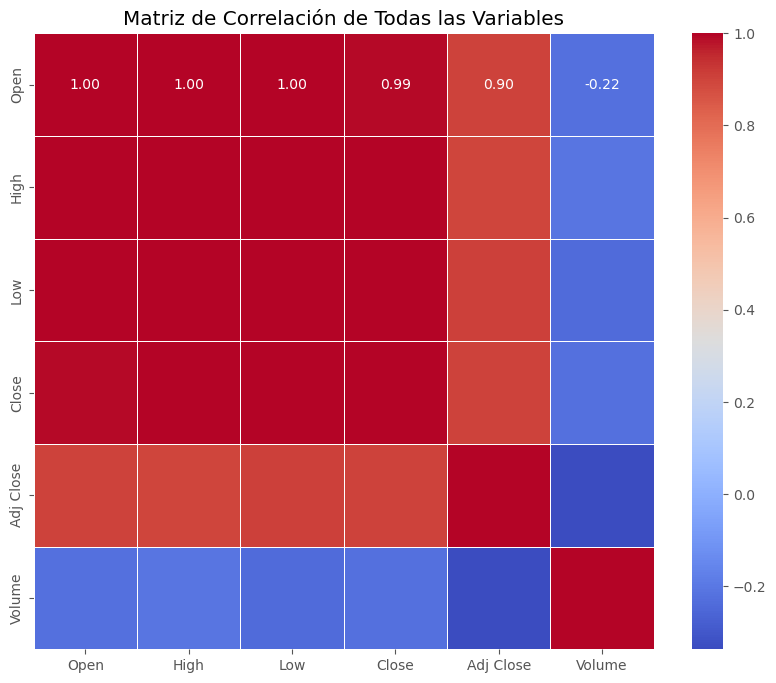

In [20]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación de Todas las Variables')
plt.show()

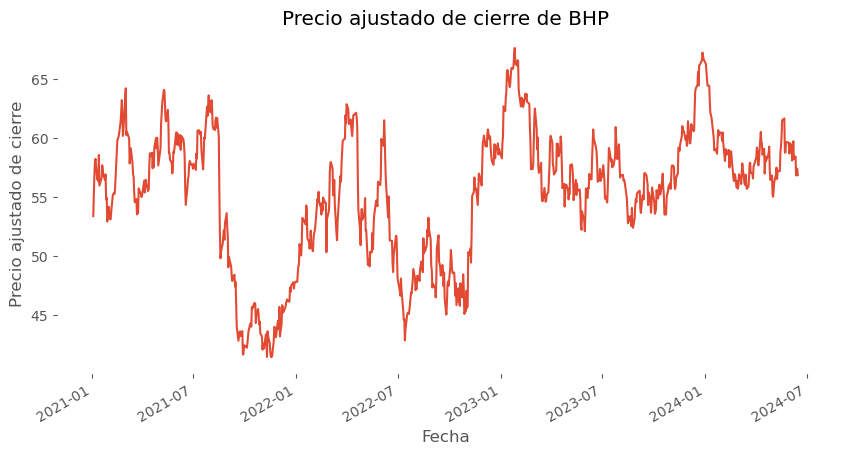

In [21]:
# Gráfico del precio ajustado de cierre
df['Adj Close'].plot(title='Precio ajustado de cierre de BHP')
plt.xlabel('Fecha')
plt.ylabel('Precio ajustado de cierre')
plt.show()

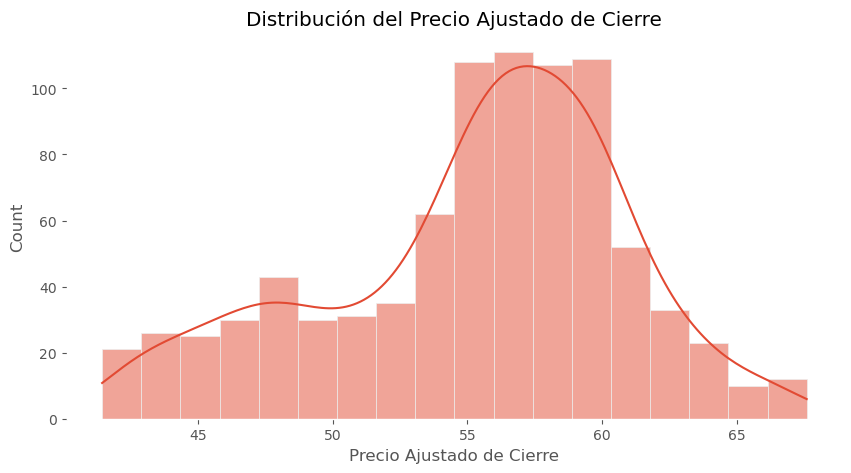

In [22]:
# 2. Visualización de la distribución del precio
sns.histplot(df['Adj Close'], kde=True)
plt.title('Distribución del Precio Ajustado de Cierre')
plt.xlabel('Precio Ajustado de Cierre')
plt.show()

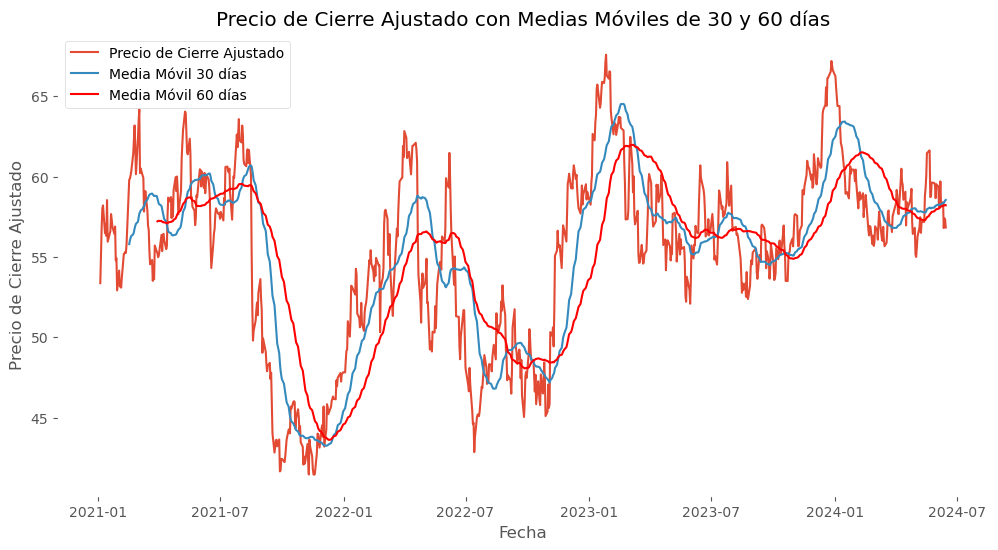

In [23]:
# 3. Gráfico de precio con medias móviles de 30 y 60 días
df['30MA'] = df['Adj Close'].rolling(window=30).mean()
df['60MA'] = df['Adj Close'].rolling(window=60).mean()
plt.figure(figsize=(12, 6))
plt.plot(df['Adj Close'], label='Precio de Cierre Ajustado')
plt.plot(df['30MA'], label='Media Móvil 30 días')
plt.plot(df['60MA'], label='Media Móvil 60 días', color='red')
plt.title('Precio de Cierre Ajustado con Medias Móviles de 30 y 60 días')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre Ajustado')
plt.legend()
plt.show()

In [24]:
# Preparar datos
df['Lag_1'] = df['Adj Close'].shift(1)
df.dropna(inplace=True)  # Eliminar cualquier fila con datos faltantes
X = df[['Lag_1']]  # Usamos el precio ajustado de cierre del día anterior como feature
y = df['Adj Close']  # El precio ajustado de cierre es nuestro target

In [25]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
# Crear y entrenar el modelo SVR
model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
model.fit(X_train_scaled, y_train)

SVR(C=100, gamma=0.1)

In [28]:
# Predecir
y_pred = model.predict(X_test_scaled)

In [35]:
# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')

Mean Squared Error: 1.2824325730807782
Root Mean Squared Error: 1.1324453951872373
Mean Absolute Error: 0.8577981997934799


In [36]:
# Crear un DataFrame con los resultados
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

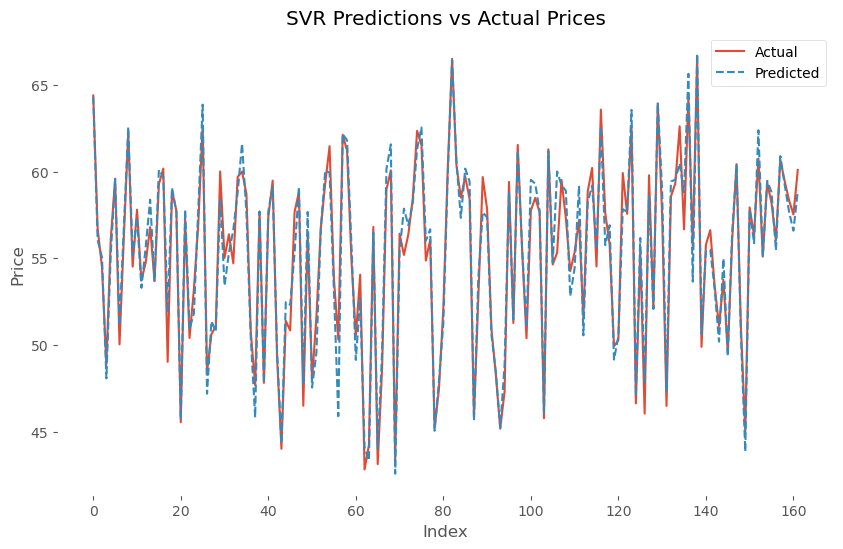

In [37]:
# 4. Comparación del Precio Actual vs Precio Predicho
plt.figure(figsize=(10, 6))
plt.plot(results['Actual'].values, label='Actual')
plt.plot(results['Predicted'].values, label='Predicted', linestyle='--')
plt.legend()
plt.title('SVR Predictions vs Actual Prices')
plt.xlabel('Index')
plt.ylabel('Price')
plt.show()

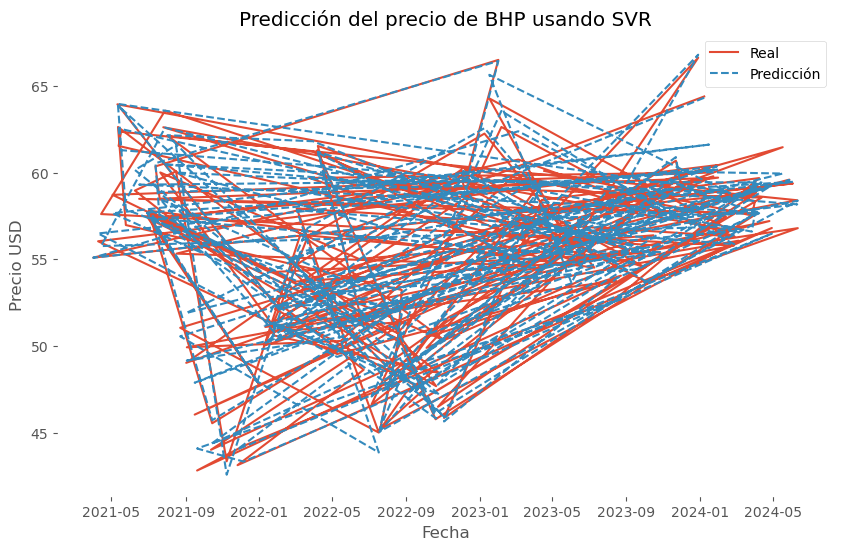

In [38]:
# Visualizar resultados
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Real')
plt.plot(y_test.index, y_pred, label='Predicción', linestyle='--')
plt.title('Predicción del precio de BHP usando SVR')
plt.xlabel('Fecha')
plt.ylabel('Precio USD')
plt.legend()
plt.show()

In [39]:
# Mostrar los primeros resultados
print(results.head())

               Actual  Predicted
Date                            
2024-01-08  64.396553  64.321834
2022-06-01  56.733074  56.061366
2022-02-22  54.466927  55.057099
2022-07-29  48.888573  48.077009
2023-05-17  56.108009  55.256750


In [41]:
# Mostrar predicción para el siguiente día
next_day_prediction = model.predict(scaler.transform([[y.iloc[-1]]]))
print(f"El precio de BHP se pronóstica según el modelo SVR para el siguiente día como: ${next_day_prediction[0]:.2f} por acción.")

El precio de BHP se pronóstica según el modelo SVR para el siguiente día como: $56.87 por acción.
